In [1]:

import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd

In [2]:
!pwd

/content


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
path_inception = f"{getcwd()}/../content/drive/MyDrive/InceptionModel/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = path_inception

pre_trained_model = InceptionV3(input_shape = (224,224,3),
                               include_top  = False,
                               weights      = None)

pre_trained_model.load_weights(local_weights_file)


for layer in pre_trained_model.layers:
      layer.trainable = False


pre_trained_model.summary()





Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [5]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output



last layer output shape:  (None, 12, 12, 768)


In [7]:
from tensorflow.keras.optimizers import Adam


x = layers.Flatten()(last_output)

x = layers.Dense(1024, activation = 'relu')(x)

x = layers.Dropout(0.2)(x)                  

x = layers.Dense  (1, activation = 'sigmoid')(x)           

model = Model( pre_trained_model.input, x) 
l_rate = 0.001
model.compile(optimizer = Adam(lr=l_rate), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
#1

path_dataset = f"{getcwd()}/../content/drive/MyDrive/DATASETS_INCEPTION/SKCANCER.zip"


In [9]:

from zipfile import ZipFile
file_name = path_dataset

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')



Done


In [10]:

import os 
melignant = os.path.join('../content/SKCANCER/malignant')
benign = os.path.join('../content/SKCANCER/benign')
print('Total malignant Images:',len(os.listdir(melignant)))
print('Total benign Images:',len(os.listdir(benign)))

Total malignant Images: 1497
Total benign Images: 1800


In [11]:
#3

malignant_files = os.listdir(melignant)
print(malignant_files[:10])
benign_files = os.listdir(benign)
print(benign_files[:10])

['1391.jpg', '1151.jpg', '1266.jpg', '342.jpg', '136.jpg', '149.jpg', '917.jpg', '1358.jpg', '612.jpg', '768.jpg']
['1391.jpg', '1151.jpg', '1786.jpg', '1266.jpg', '342.jpg', '136.jpg', '149.jpg', '917.jpg', '1358.jpg', '1780.jpg']


In [12]:

from glob import glob
import os.path
from shutil import copy2

path = '../content/SKCANCER'
test = '../content/Test'
train = '../content/Train'

if not os.path.exists(test):
	os.makedirs(test)
if not os.path.exists(train):
	os.makedirs(train)
 
for folder in glob(path+'/*'):
		print(folder)
		# find number of images in folder
		no_images_in_folder = len(os.listdir(folder))
		# make new folder inside test and train
		folder_test = test+'/'+folder.split('/')[3]+'/'
		folder_train = train+'/'+folder.split('/')[3]+'/'
		# print(folder_test)
		# print(folder_train)
		if not os.path.exists(folder_test):
			os.makedirs(folder_test)
		if not os.path.exists(folder_train):
			os.makedirs(folder_train)

		print("no of images in this folder: {}".format(no_images_in_folder))
		train_num = int(no_images_in_folder*0.8)
		
		
		for idx, im in enumerate(glob(folder+'/*')):
			
			if idx <= train_num:
		
				copy2(im, folder_train)
			else:
			
				copy2(im, folder_test)


../content/SKCANCER/malignant
no of images in this folder: 1497
../content/SKCANCER/benign
no of images in this folder: 1800


In [13]:
train_dir = '/content/Train'
validation_dir = '/content/Test'

train_malignant_dir = os.path.join(train_dir,'malignant')
train_benign_dir = os.path.join(train_dir,'benign')
validation_malignant_dir = os.path.join(validation_dir,'malignant')
validation_benign_dir = os.path.join(validation_dir,'benign')

train_malignant_fnames = os.listdir(train_malignant_dir)
train_benign_fnames = os.listdir(train_benign_dir)
validation_malignant_fnames = os.listdir(validation_malignant_dir)
validation_benign_fnames = os.listdir(validation_benign_dir)

print(len(train_malignant_fnames))
print(len(train_benign_fnames))
print(len(validation_malignant_fnames))
print(len(validation_benign_fnames))

1198
1441
299
359


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = (224,224)

train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,  
        target_size=IMAGE_SIZE, 
        batch_size=32,
        class_mode='binary')

validation_generator =  test_datagen.flow_from_directory( validation_dir,  
        target_size=IMAGE_SIZE, 
        batch_size=32,
        class_mode='binary')


Found 2639 images belonging to 2 classes.
Found 658 images belonging to 2 classes.


In [15]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.99):
            print("\nReached 99.0% accuracy so cancelling training!")
            self.model.stop_training = True

In [16]:
###use full 
!pip install keras
from keras import optimizers

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['acc']
              )


In [17]:

EPOCHS = 15
history = model.fit_generator(train_generator,
                              validation_data = validation_generator,
                              steps_per_epoch =train_generator.samples//train_generator.batch_size,
                              epochs = EPOCHS,
                              validation_steps = validation_generator.samples//validation_generator.batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/15
82/82 [==============================] - 368s 4s/step - loss: 1.9686 - acc: 0.7580 - val_loss: 0.7683 - val_acc: 0.7953
Epoch 2/15
82/82 [==============================] - 362s 4s/step - loss: 0.4882 - acc: 0.8147 - val_loss: 0.3598 - val_acc: 0.8375
Epoch 3/15
82/82 [==============================] - 362s 4s/step - loss: 0.3634 - acc: 0.8381 - val_loss: 0.3850 - val_acc: 0.8266
Epoch 4/15
82/82 [==============================] - 362s 4s/step - loss: 0.3489 - acc: 0.8416 - val_loss: 0.3278 - val_acc: 0.8500
Epoch 5/15
82/82 [==============================] - 363s 4s/step - loss: 0.3267 - acc: 0.8527 - val_loss: 0.3841 - val_acc: 0.8234
Epoch 6/15
82/82 [==============================] - 363s 4s/step - loss: 0.3097 - acc: 0.8554 - val_loss: 0.3772 - val_acc: 0.8219
Epoch 7/15
82/82 [==============================] - 363s 4s/step - loss: 0.3027 - acc: 0.8604 - val_loss: 0.3351 - val_acc: 0.8438
Epoch 8/15
82/82 [==============================] - 362s 4s/step - loss: 0.3066 - a

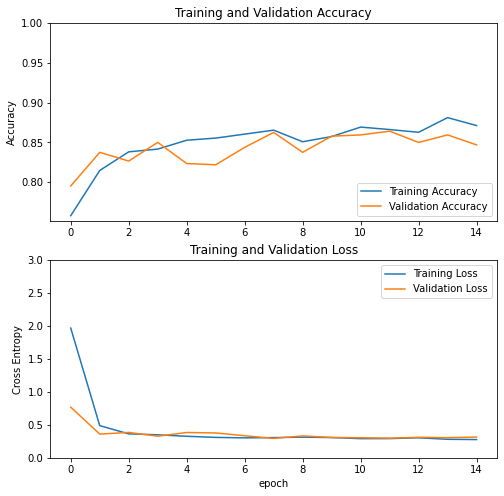

In [23]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()